<a href="https://colab.research.google.com/github/InezaRW/InezaRW/blob/main/Multi_Hazard_Rwanda_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries Used

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Used

In [44]:
data = '/content/Multi_Hazard_Rwanda_2021.csv'
df = pd.read_csv(data)
df.head()

,Province,District,Hazard,Death_2021,Damaged_House_2021
0,Kigali,Gasabo,Flood,7,5
1,Kigali,Gasabo,Landslide,12,8
2,Kigali,Gasabo,Rainstorm,2,149
3,Kigali,Gasabo,Windstom,0,13
4,Kigali,Gasabo,Lightenin,3,3


#Data Description

In [45]:
print(df.describe())

       Death_2021  Damaged_House_2021
count  150.000000          150.000000
mean     2.173333           54.840000
std      4.301938          139.428897
min      0.000000            0.000000
25%      0.000000            0.000000
50%      1.000000            5.000000
75%      2.000000           46.000000
max     28.000000         1169.000000


#Checking for missing

In [46]:
print(df.isnull().sum())

Province              0
District              0
Hazard                0
Death_2021            0
Damaged_House_2021    0
dtype: int64


#Visualisation

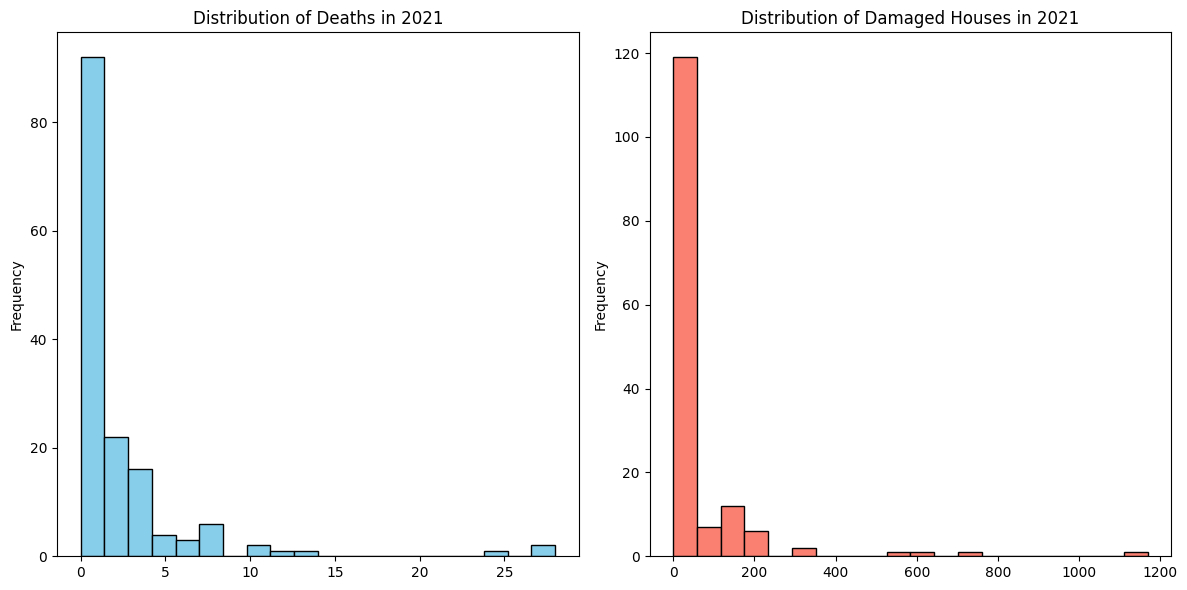

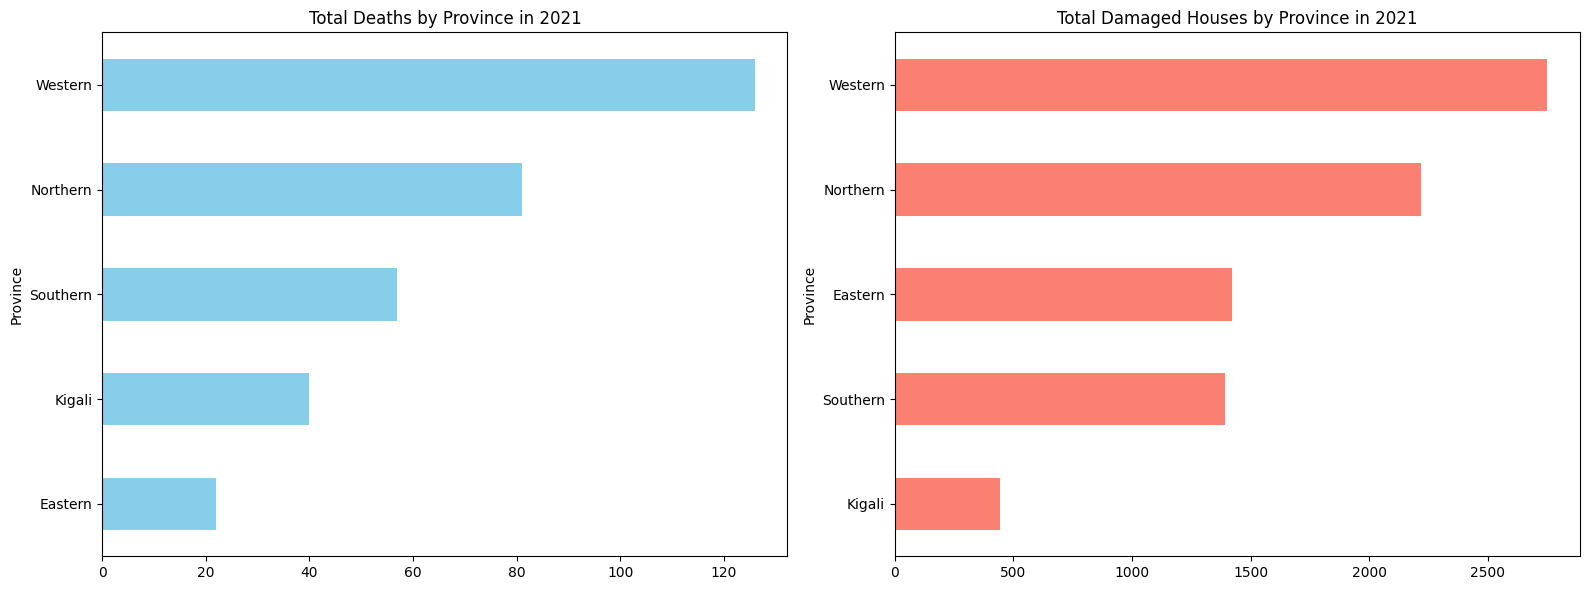

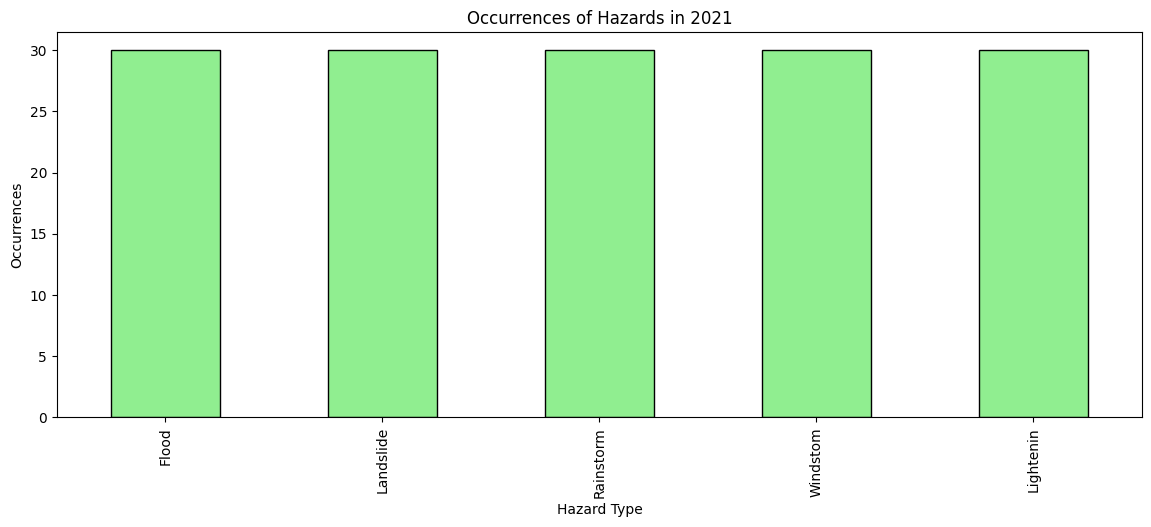

In [47]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['Death_2021'].plot(kind='hist', bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Deaths in 2021')

plt.subplot(1, 2, 2)
df['Damaged_House_2021'].plot(kind='hist', bins=20, edgecolor='black', color='salmon')
plt.title('Distribution of Damaged Houses in 2021')

plt.tight_layout()
plt.show()

# Explore regional variations
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
df.groupby('Province')['Death_2021'].sum().sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Deaths by Province in 2021')

plt.subplot(1, 2, 2)
df.groupby('Province')['Damaged_House_2021'].sum().sort_values().plot(kind='barh', color='salmon')
plt.title('Total Damaged Houses by Province in 2021')

plt.tight_layout()
plt.show()

# Explore hazard occurrences
plt.figure(figsize=(14, 5))
df['Hazard'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Occurrences of Hazards in 2021')
plt.xlabel('Hazard Type')
plt.ylabel('Occurrences')
plt.show()

<ipython-input-76-e3954164bab5>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Province', y='Death_2021', data=df, hue='Hazard', ci=None)


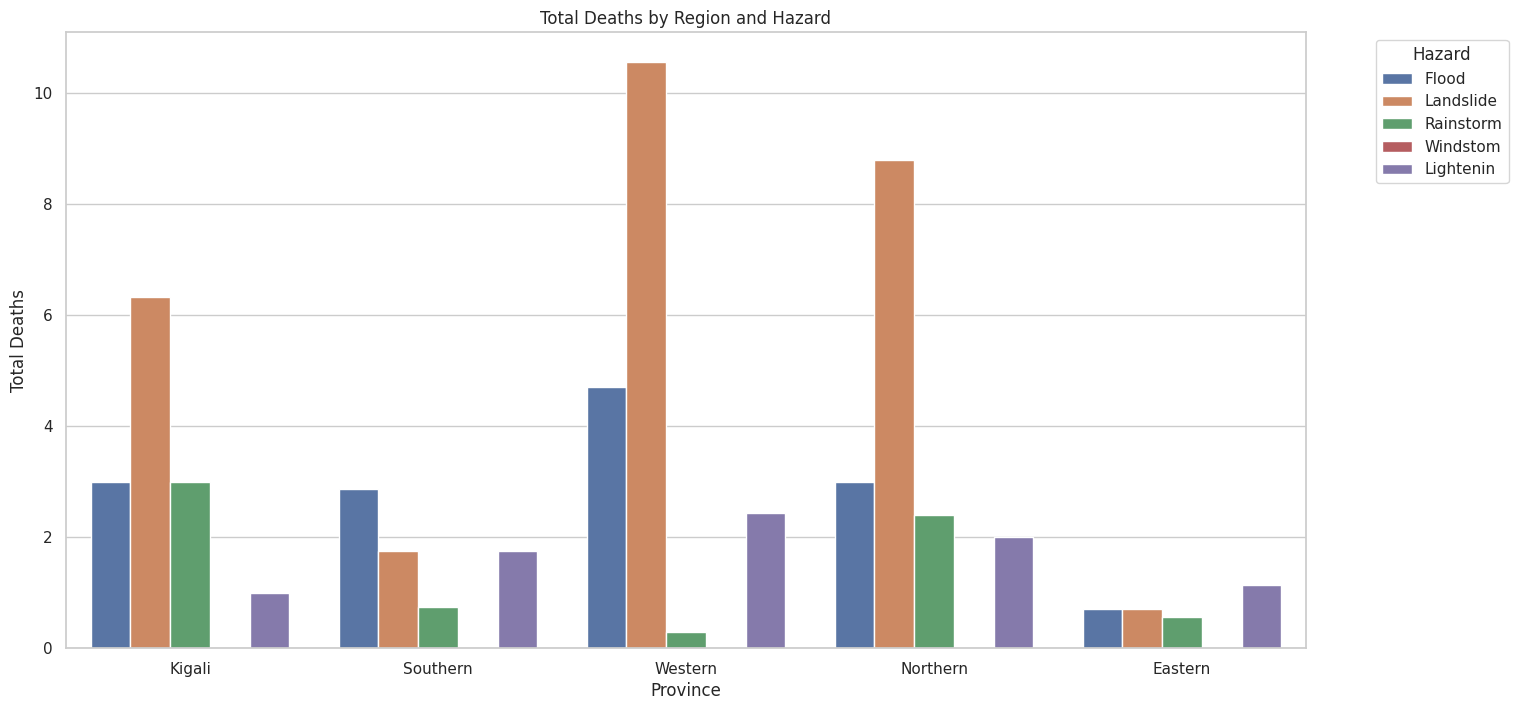

<ipython-input-76-e3954164bab5>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Province', y='Damaged_House_2021', data=df, hue='Hazard', ci=None)


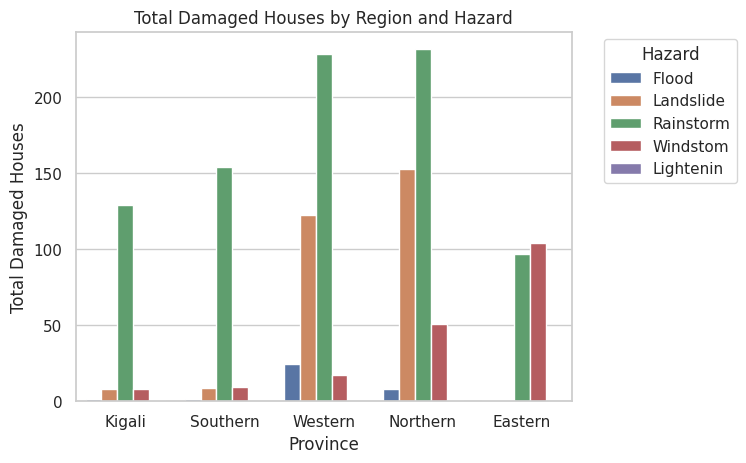

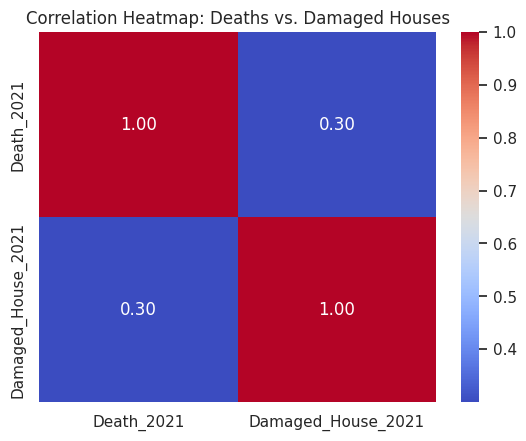

In [76]:
# Explore regional variations in the impact of various hazards
plt.figure(figsize=(16, 8))

# Bar plot for total deaths and house damage by region
sns.barplot(x='Province', y='Death_2021', data=df, hue='Hazard', ci=None)
plt.title('Total Deaths by Region and Hazard')
plt.xlabel('Province')
plt.ylabel('Total Deaths')
plt.legend(title='Hazard', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

sns.barplot(x='Province', y='Damaged_House_2021', data=df, hue='Hazard', ci=None)
plt.title('Total Damaged Houses by Region and Hazard')
plt.xlabel('Province')
plt.ylabel('Total Damaged Houses')
plt.legend(title='Hazard', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Correlation heatmap
correlation_matrix = df[['Death_2021', 'Damaged_House_2021']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Deaths vs. Damaged Houses')
plt.show()



#Visualization

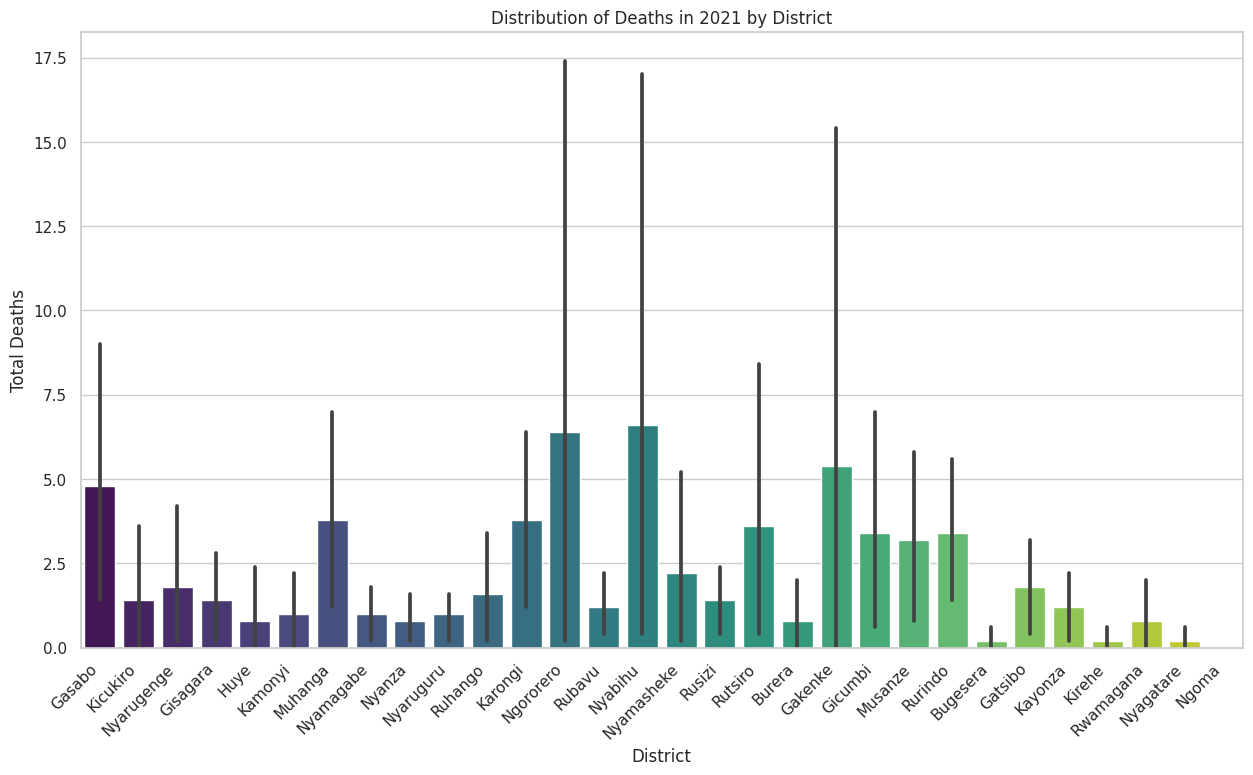

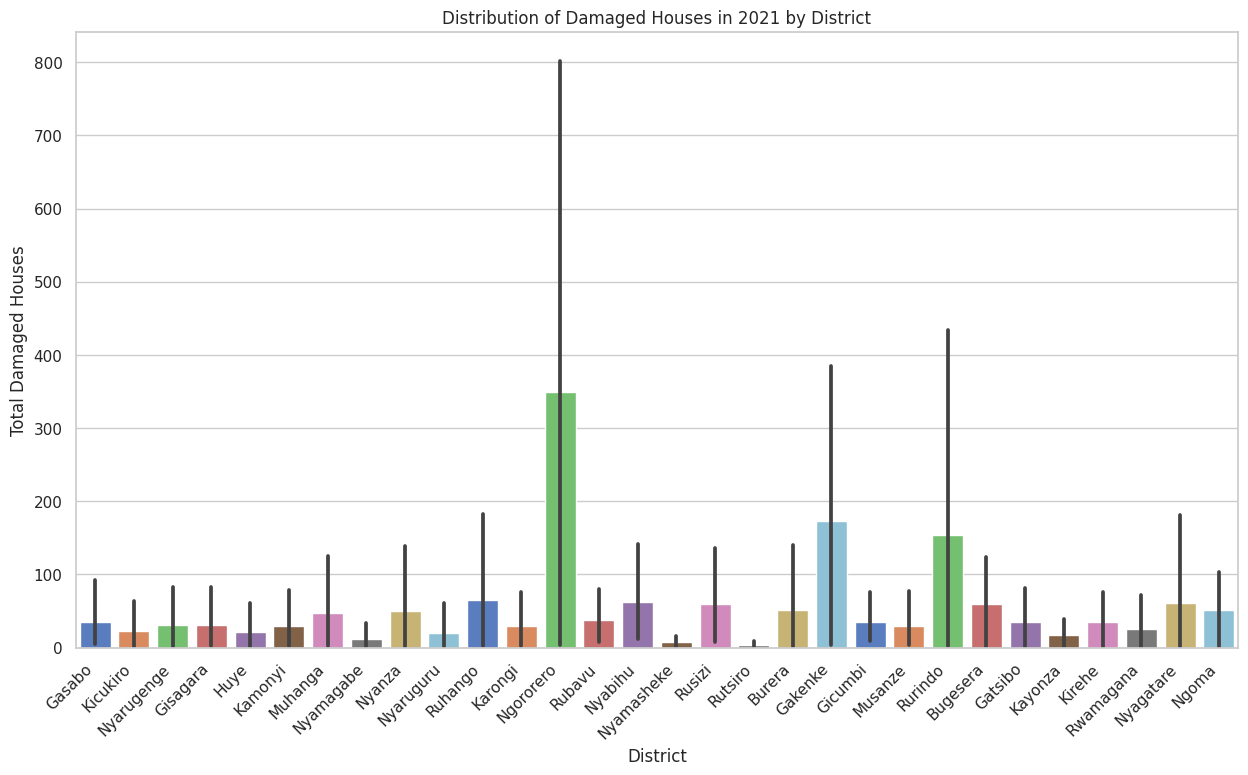

In [65]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Plot deaths
sns.barplot(x='District', y='Death_2021', data=df, palette='viridis')
plt.title('Distribution of Deaths in 2021 by District')
plt.xlabel('District')
plt.ylabel('Total Deaths')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Plot damaged houses
sns.barplot(x='District', y='Damaged_House_2021', data=df, palette='muted')
plt.title('Distribution of Damaged Houses in 2021 by District')
plt.xlabel('District')
plt.ylabel('Total Damaged Houses')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()



# Calculate severity and likelihood for each district, using the sum of 'Death_2021' and 'Damaged_House_2021' as severity and the count of hazards as likelihood
# Prioritize groups based on total risk
# Calculate risk as a percentage of the total risk


Calculated Severity and Likelihood:
    District     Hazard  Severity  Likelihood
0     Gasabo      Flood        12           5
1     Gasabo  Landslide        20           5
2     Gasabo  Rainstorm       151           5
3     Gasabo   Windstom        13           5
4     Gasabo  Lightenin         6           5
..       ...        ...       ...         ...
145    Ngoma      Flood         0           5
146    Ngoma  Landslide         3           5
147    Ngoma  Rainstorm       122           5
148    Ngoma   Windstom       131           5
149    Ngoma  Lightenin         0           5

[150 rows x 4 columns]

Assigned Groups:
    District     Hazard            Group
0     Gasabo      Flood  Flood_Landslide
1     Gasabo  Landslide  Flood_Landslide
2     Gasabo  Rainstorm            Other
3     Gasabo   Windstom            Other
4     Gasabo  Lightenin            Other
..       ...        ...              ...
145    Ngoma      Flood  Flood_Landslide
146    Ngoma  Landslide  Flood_Landslide


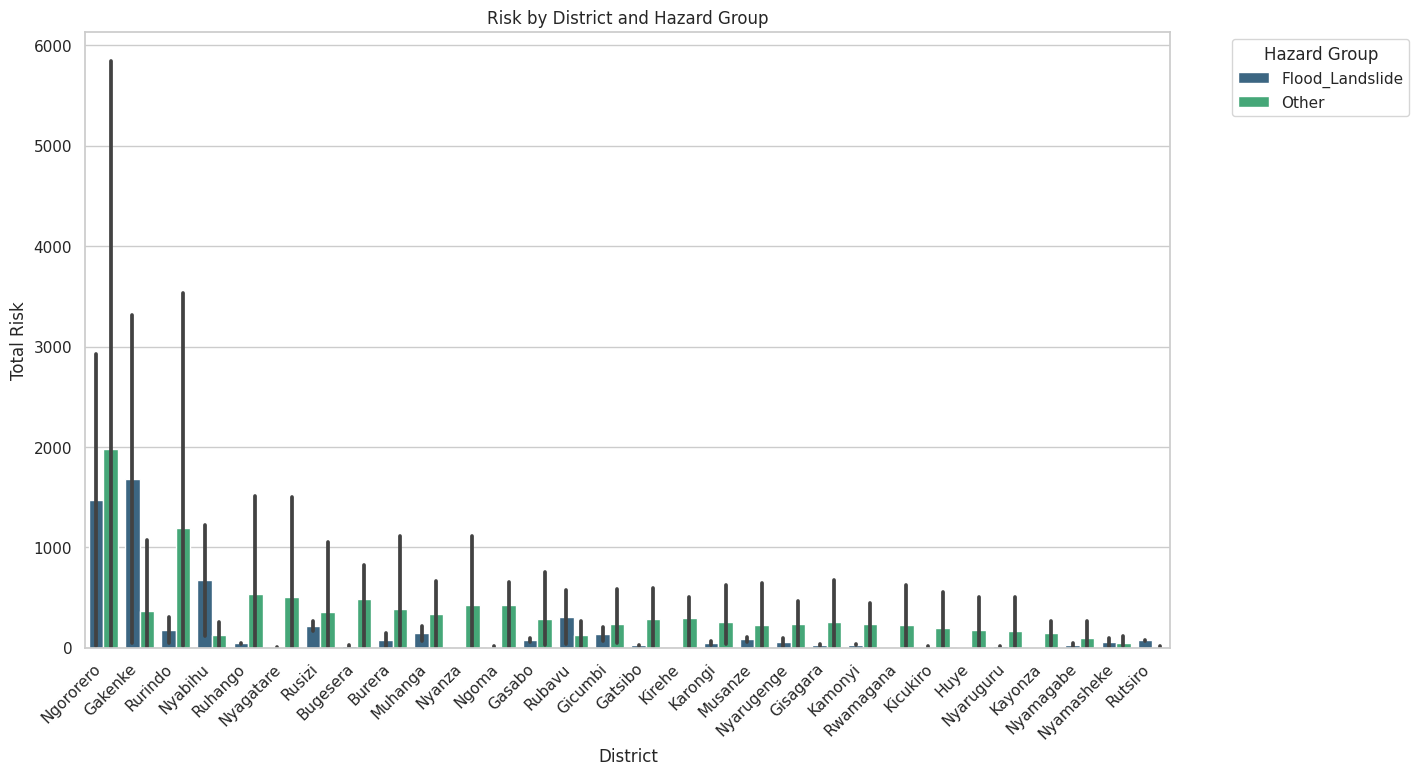

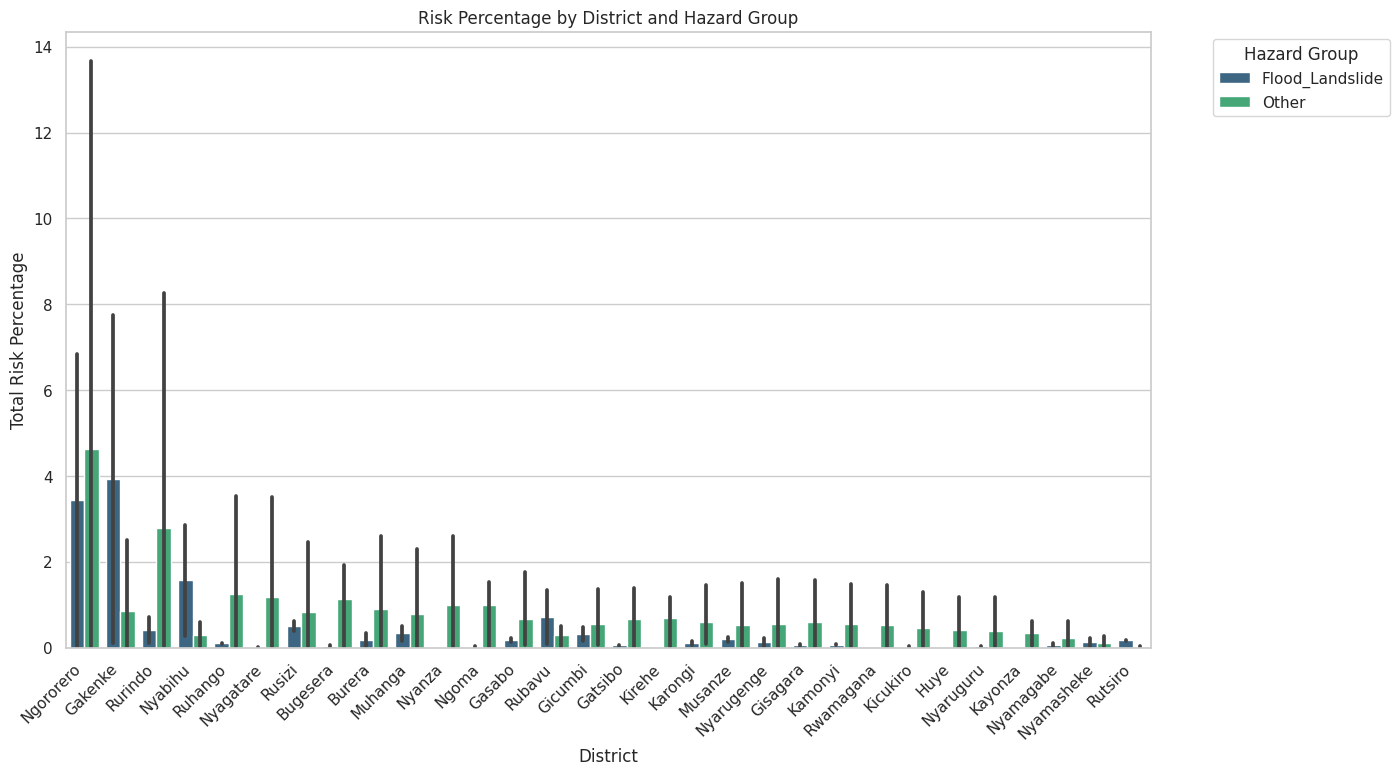

In [66]:
df['Severity'] = df['Death_2021'] + df['Damaged_House_2021']
df['Likelihood'] = df.groupby('District')['Hazard'].transform('count')

# Display the calculated severity and likelihood
print("\nCalculated Severity and Likelihood:")
print(df[['District', 'Hazard', 'Severity', 'Likelihood']])

# Group districts based on hazard types
flood_landslide_group = ['Flood', 'Landslide']
lightning_group = ['Lightning']
other_group = ['Rainstorm', 'Windstom']  # Assuming the remaining hazards fall into this group

# Assign groups based on hazard types
df['Group'] = np.where(df['Hazard'].isin(flood_landslide_group), 'Flood_Landslide',
                       np.where(df['Hazard'].isin(lightning_group), 'Lightning', 'Other'))

# Display the assigned groups
print("\nAssigned Groups:")
print(df[['District', 'Hazard', 'Group']])

# Calculate risk as the product of severity and likelihood
df['Risk'] = df['Severity'] * df['Likelihood']

# Display the calculated risk
print("\nCalculated Risk:")
print(df[['District', 'Hazard', 'Risk']])

# Prioritize groups based on total risk
group_prioritization = df.groupby('Group')['Risk'].sum().sort_values(ascending=False).index

# Display the prioritized groups
print("\nPrioritized Groups:")
print(group_prioritization)

# Calculate risk as a percentage of the total risk
df['Risk_Percentage'] = (df['Risk'] / df['Risk'].sum()) * 100

# Display the calculated risk percentage
print("\nCalculated Risk Percentage:")
print(df[['District', 'Hazard', 'Risk_Percentage']])

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='District', y='Risk', hue='Group', data=df, palette='viridis', order=df.groupby('District')['Risk'].sum().sort_values(ascending=False).index)
plt.title('Risk by District and Hazard Group')
plt.xlabel('District')
plt.ylabel('Total Risk')
plt.legend(title='Hazard Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='District', y='Risk_Percentage', hue='Group', data=df, palette='viridis', order=df.groupby('District')['Risk'].sum().sort_values(ascending=False).index)
plt.title('Risk Percentage by District and Hazard Group')
plt.xlabel('District')
plt.ylabel('Total Risk Percentage')
plt.legend(title='Hazard Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


#Criteria: Please note that the probabilities are based on the assumption that the impact of each hazard in a district contributes to the overall probability of that hazard in the province.

In [67]:

# Calculate probability of each hazard in each district
df['Probability_Death'] = df['Death_2021'] / df.groupby('District')['Death_2021'].transform('sum')
df['Probability_Damaged_House'] = df['Damaged_House_2021'] / df.groupby('District')['Damaged_House_2021'].transform('sum')

# Calculate probability contribution of each hazard in each province
province_probs = df.groupby(['Province', 'Hazard'])[['Probability_Death', 'Probability_Damaged_House']].mean().reset_index()

# Print table with province, hazard, and probability contribution
print(province_probs)


    Province     Hazard  Probability_Death  Probability_Damaged_House
0    Eastern      Flood           0.101852                   0.004074
1    Eastern  Landslide           0.111111                   0.002147
2    Eastern  Lightenin           0.495370                   0.000000
3    Eastern  Rainstorm           0.291667                   0.547256
4    Eastern   Windstom           0.000000                   0.446523
5     Kigali      Flood           0.171296                   0.009363
6     Kigali  Landslide           0.436508                   0.054134
7     Kigali  Lightenin           0.041667                   0.005618
8     Kigali  Rainstorm           0.350529                   0.878019
9     Kigali   Windstom           0.000000                   0.052866
10  Northern      Flood           0.172903                   0.036040
11  Northern  Landslide           0.410185                   0.233102
12  Northern  Lightenin           0.156618                   0.002604
13  Northern  Rainst

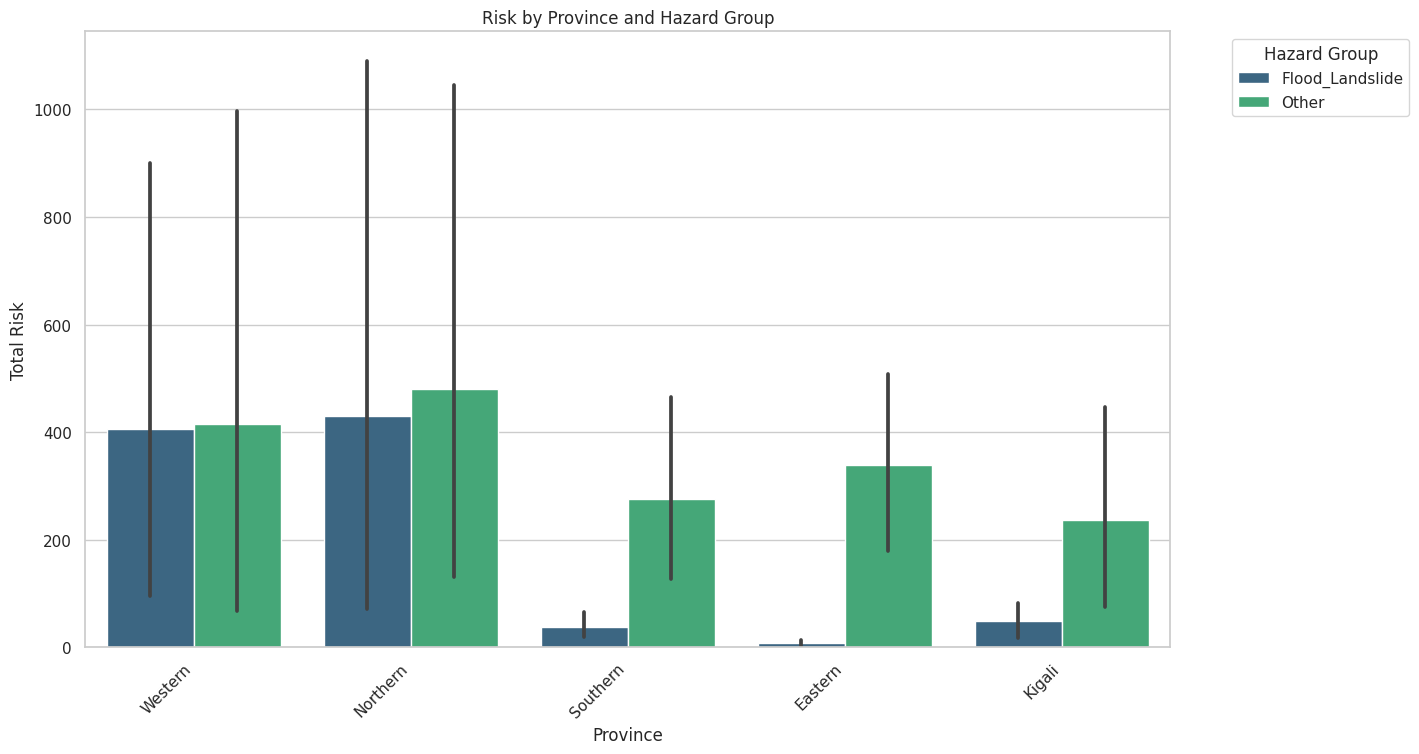

In [69]:
# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(x='Province', y='Risk', hue='Group', data=df, palette='viridis', order=df.groupby('Province')['Risk'].sum().sort_values(ascending=False).index)
plt.title('Risk by Province and Hazard Group')
plt.xlabel('Province')
plt.ylabel('Total Risk')
plt.legend(title='Hazard Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()


#Patern variation

In [49]:
import pandas as pd

# Load data into a DataFrame
data = pd.read_csv("/content/Multi_Hazard_Rwanda_2021.csv")

# Now you can use groupby on the DataFrame
district_with_highest_deaths = data.groupby('District')['Death_2021'].sum().idxmax()
district_with_highest_damage = data.groupby('District')['Damaged_House_2021'].sum().idxmax()

# Print the results
print(f"District with the highest total deaths: {district_with_highest_deaths}")
print(f"District with the highest total damaged houses: {district_with_highest_damage}")


District with the highest total deaths: Nyabihu
District with the highest total damaged houses: Ngororero
